In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, auc, ConfusionMatrixDisplay, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [3]:
df=pd.read_csv('Titanic-Dataset.csv')
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())

In [4]:
df['Title'] = df['Name'].str.extract(r',\s*([^\.]+)\.')
df['TitleCategory'] = df['Title'].replace({'Mr': 'Mr', 'Miss': 'Mrs', 'Mrs': 'Mrs', 'Master': 'Mr', 'Dr': 'Officers', 'Rev': 'Officers', 'Mlle': 'Mrs', 'Major': 'Officers', 'Col': 'Officers', 'the Countess': 'Mrs', 'Capt': 'Officers', 'Ms': 'Mrs', 'Sir': 'Officers', 'Lady': 'Mrs', 'Mme': 'Mrs', 'Don': 'Officers', 'Jonkheer': 'Officers'})
df['Family'] = df['SibSp'] + df['Parch']
df['FareCategory'] = pd.cut(df['Fare'], bins=[0, 100, 200, 513], labels=['Low', 'Medium', 'High'])
df['AgeCategory'] = pd.cut(df['Age'], bins=[0, 20, 40, 60, 80], labels=['Child', 'Boy', 'Young', 'Old'])
df['FamilyCategory'] = pd.cut(df['Family'], bins=[-1, 0, 3, 10], labels=['Single', 'Medium', 'Large'])
df['SexCategory'] = df['Sex'].map({'male': 1, 'female': 0})

In [5]:
df.drop(['PassengerId', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Family', 'Title', 'Sex'], axis=1, inplace=True)

In [6]:
df = df.astype({'Embarked': 'str', 'TitleCategory': 'str', 'FareCategory': 'str', 'AgeCategory': 'str', 'FamilyCategory': 'str'})
df = df.astype({'Survived': 'int32', 'SexCategory': 'int32'})
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
X_train = pd.get_dummies(X_train, columns=['Pclass', 'Embarked', 'TitleCategory', 'FareCategory', 'AgeCategory', 'FamilyCategory'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['Pclass', 'Embarked', 'TitleCategory', 'FareCategory', 'AgeCategory', 'FamilyCategory'], drop_first=True)

In [8]:
model = LogisticRegression(max_iter=1000)  # Increase max_iter if needed
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [9]:
y_pred = model.predict(X_test)

In [10]:
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy:  0.8100558659217877
Precision:  0.803030303030303
Recall:  0.7162162162162162
F1 Score:  0.7571428571428571

Confusion Matrix:
 [[92 13]
 [21 53]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.72      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



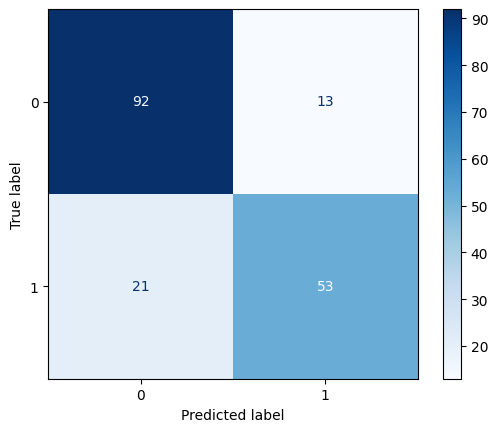

In [11]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')

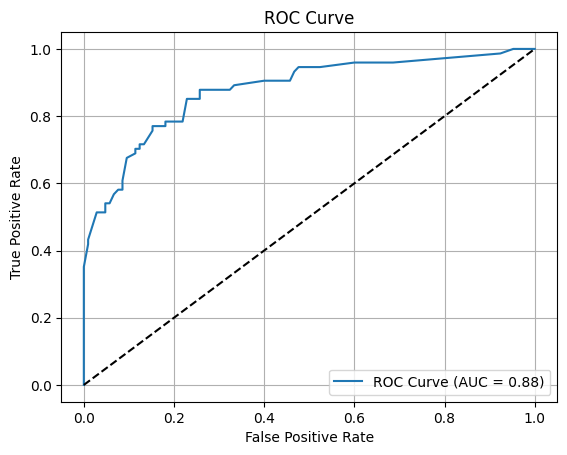

In [12]:
y_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [13]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [14]:
y_pred_dt = dt_model.predict(X_test)

In [15]:
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))
print("F1 Score:", f1_score(y_test, y_pred_dt))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

Accuracy: 0.7821229050279329
Precision: 0.8070175438596491
Recall: 0.6216216216216216
F1 Score: 0.7022900763358778

Confusion Matrix:
 [[94 11]
 [28 46]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.90      0.83       105
           1       0.81      0.62      0.70        74

    accuracy                           0.78       179
   macro avg       0.79      0.76      0.77       179
weighted avg       0.79      0.78      0.78       179



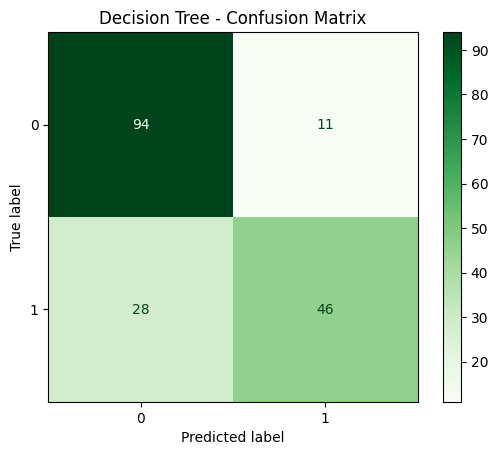

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(dt_model, X_test, y_test, cmap='Greens')
plt.title("Decision Tree - Confusion Matrix")
plt.show()

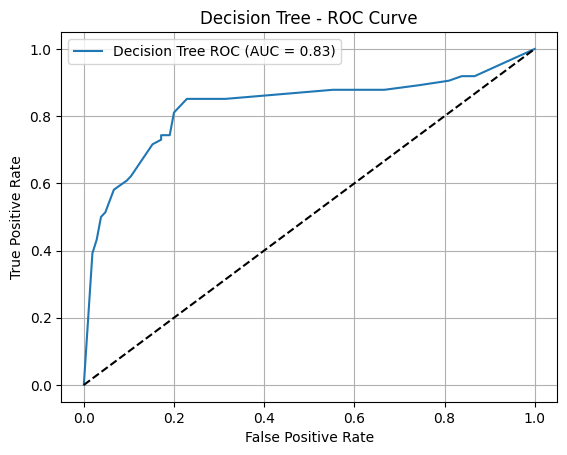

In [17]:
from sklearn.metrics import roc_curve, roc_auc_score
y_proba_dt = dt_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba_dt)
roc_auc = roc_auc_score(y_test, y_proba_dt)
plt.plot(fpr, tpr, label=f"Decision Tree ROC (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Decision Tree - ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

In [18]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [19]:
y_pred_rf = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Accuracy: 0.7988826815642458
Precision: 0.796875
Recall: 0.6891891891891891
F1 Score: 0.7391304347826086

Confusion Matrix:
 [[92 13]
 [23 51]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.88      0.84       105
           1       0.80      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



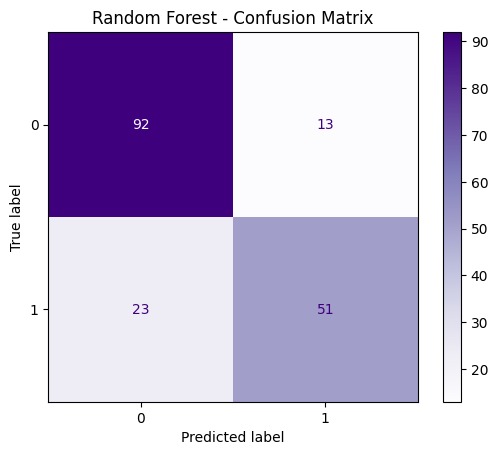

In [20]:
ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test, cmap='Purples')
plt.title("Random Forest - Confusion Matrix")
plt.show()

In [21]:
y_proba_rf = rf_model.predict_proba(X_test)[:, 1
fpr, tpr, _ = roc_curve(y_test, y_proba_rf)
roc_auc = roc_auc_score(y_test, y_proba_rf)
plt.plot(fpr, tpr, label=f"Random Forest ROC (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest - ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

SyntaxError: '[' was never closed (4006364135.py, line 1)

In [22]:
# hyperparameter tuning by gridsearchcv on logisticRegression model
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],   
    'penalty': ['l2'],              
    'solver': ['lbfgs']             
}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best parameters from Grid Search:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Best parameters from Grid Search: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best score: 0.8061459667093469
Accuracy: 0.8100558659217877
Precision: 0.803030303030303
Recall: 0.7162162162162162
F1 Score: 0.7571428571428571

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.72      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [23]:
# hyperparameter tuning by randomizedsearchcv on logisticRegression model
param_dist = {
    'C': np.logspace(-4, 4, 20),   # Try values from 0.0001 to 10000
    'penalty': ['l2'],
    'solver': ['lbfgs']
}
random_search = RandomizedSearchCV(model, param_distributions=param_dist, 
n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)
print("Best parameters from Randomized Search:", random_search.best_params_)
print("Best score:", random_search.best_score_)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Best parameters from Randomized Search: {'solver': 'lbfgs', 'penalty': 'l2', 'C': np.float64(0.23357214690901212)}
Best score: 0.8089530188121739
Accuracy: 0.8100558659217877
Precision: 0.803030303030303
Recall: 0.7162162162162162
F1 Score: 0.7571428571428571

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.72      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

